In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pymongo


df = pd.read_csv("./Casos_positivos_de_COVID-19_en_Colombia.csv")

#Se suman la cantidad de personas recuperadas, y que fueron diagnosticadas en el mes de febrero
recuperados =(df["Recuperado"] == "Recuperado").sum()
print(f"Los recuperados totales son: {recuperados}")


Los recuperados totales son: 122501


In [5]:
# Aquí se agrupar los municipios con su respectivo valor de la columna recuperado y realiza un conteo
df_grouped = df.groupby(['Nombre municipio', 'Recuperado']).size().reset_index(name='count')

# Ordena el DataFrame del paso anterior de forma descendente
df_sorted = df_grouped.sort_values('count', ascending=False)


print(f"La ciudad con mas recuperados totales es: {df_sorted['Nombre municipio'].values[:1]} con {df_sorted['count'].values[:1]} recuperados")


La ciudad con mas recuperados totales es: ['BOGOTA'] con [34092] recuperados


Gráfica de Ciudades Vs Recuperados

                 Gráfica de Ciudades Vs Casos Recuperados


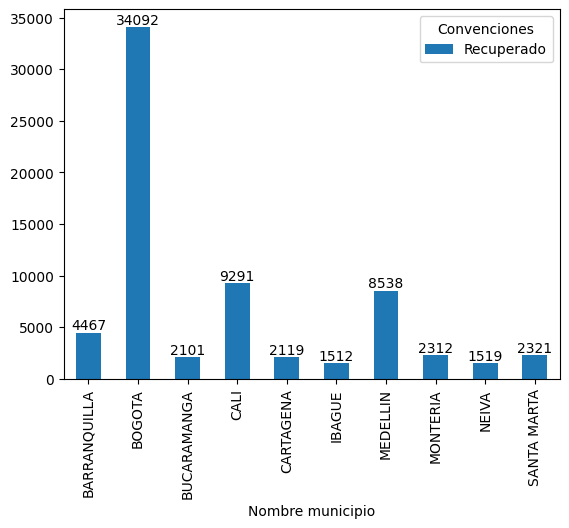

In [6]:
# Define el Top a mostrar en la gráfica
df_first = df_sorted.head(10)


# Se definen los nombres para eje X y eje Y, y envia el valor de la barra
df_pivot = df_first.pivot(index='Nombre municipio', columns='Recuperado', values='count')
ax = df_pivot.plot(kind='bar', stacked=True)


for p in ax.containers:
    ax.bar_label(p, label_type='edge')

#Imprime la etiqueta de convenciones
plt.legend(title='Convenciones')

print("                 Gráfica de Ciudades Vs Casos Recuperados")
plt.show()

Ciudad con más casos de recuperados